<a href="https://colab.research.google.com/github/nyakako/dotfiles/blob/main/mono_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ライブラリのインポート

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# データの読み込み

In [ ]:
dir_path = '/content/drive/MyDrive/DataScience/titanic/'

# 学習データの読み込み
train_df = pd.read_csv(dir_path + 'train.csv')

# テストデータの読み込み
test_df = pd.read_csv(dir_path + 'test.csv')

# データの内容確認

In [ ]:
# 学習データの先頭５行を確認してみる
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# テストデータの先頭５行を確認してみる
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# データフレームの大きさ
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


# データの特徴を確認する

In [31]:
# 学習データとテストデータを連結する
# ignore_index=Trueにすることでインデックス番号を振り直しできる
df = pd.concat([train_df, test_df], ignore_index=True)
# df = pd.concat([train_df, test_df])

In [17]:
print(df.shape)

(1309, 12)


In [18]:
# 連結するとtest_dataのSurvivedは空になる
# 最後の５行を確認
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# データの可視化

## Matplotlibで表示する方法

In [19]:
# ①性別ごとにグループ分けして、②各性別ごとにカウントする
df.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
female,466
male,843


In [22]:
# 集計結果をtmpに格納する
tmp = df.groupby('Sex').agg({'Sex':'count'}).rename(columns={'Sex':'count_sex'})
tmp

,count_sex
Sex,
female,466
male,843


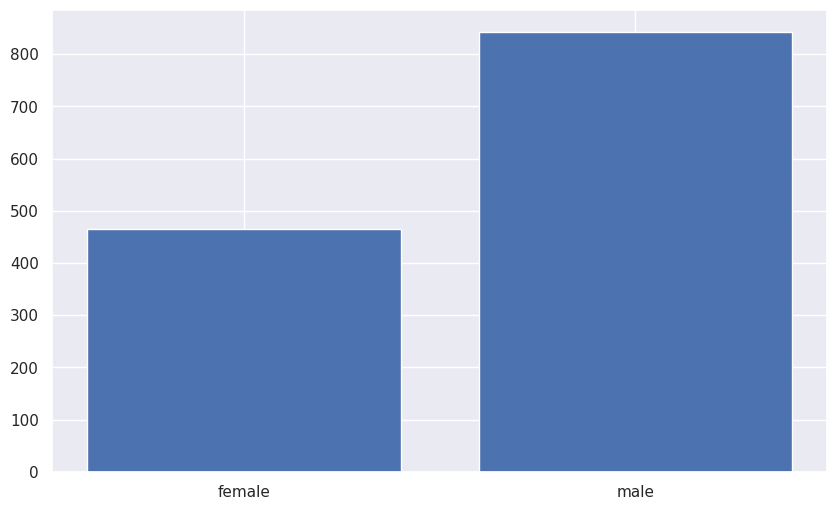

In [24]:
# グラフの大きさを設定
plt.figure(figsize=(10,6))

# 性別の数を確認してみる
plt.bar(tmp.index, tmp.count_sex)
plt.show()

## Pandasで表示する方法

<Axes: xlabel='Sex'>

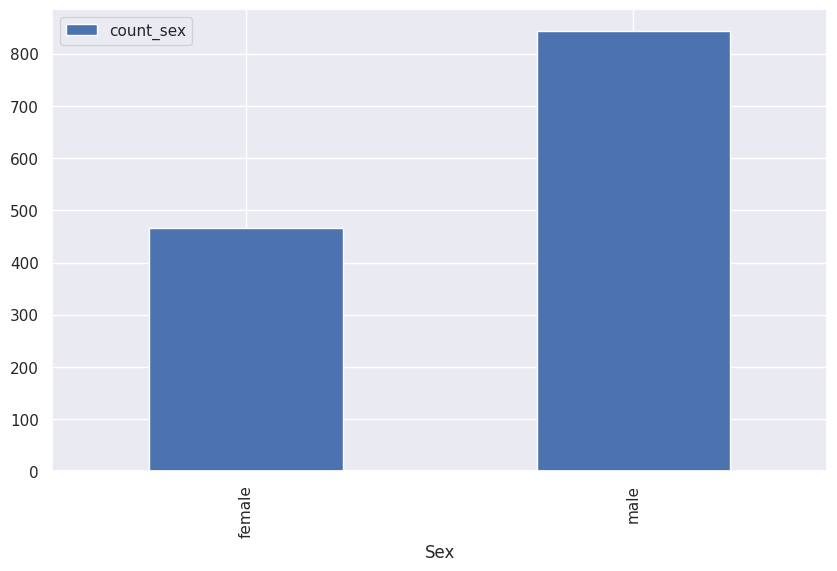

In [28]:
# pandasで棒グラフを作成する
tmp.plot(kind='bar', figsize=(10,6))

# Seabornで表示する

<Axes: xlabel='Sex', ylabel='count'>

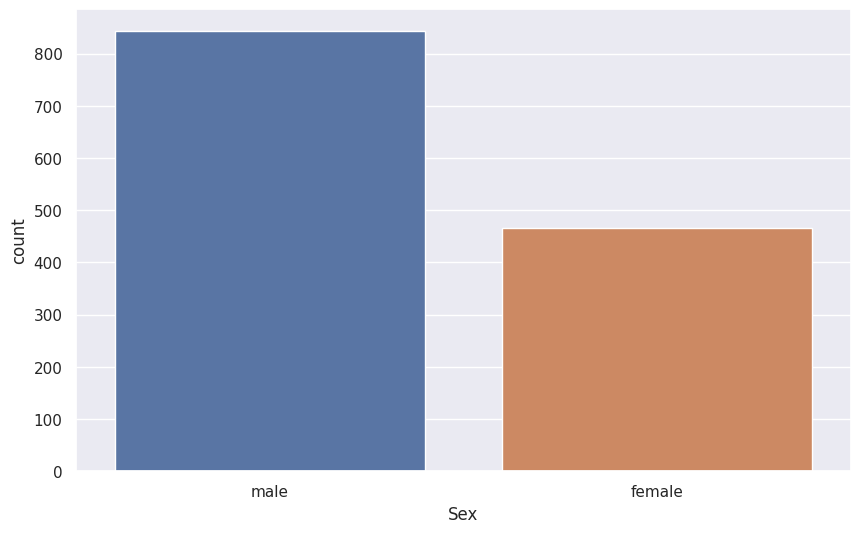

In [34]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 性別の数を確認してみる
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

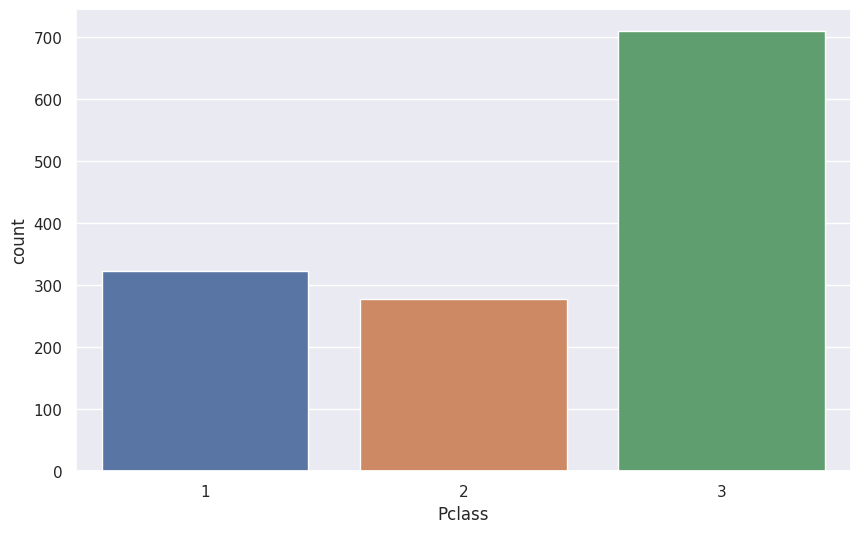

In [36]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 性別の数を確認してみる
sns.countplot(x='Pclass', data=df)

# 欠損値の確認

In [37]:
# データ内の欠損値を確認する
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 第5回